## LINEAR REGRESSION

First we prepare some data...

In [ ]:
from sklearn.datasets import make_regression
from __future__ import division
import numpy as np

def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

def train_test_split(X, y, test_size=0.9, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    # Split the training data from test data in the ratio specified in
    # test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

X, y = make_regression(n_samples=10000, n_features=1, noise=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

n_samples, n_features = np.shape(X)

In [2]:
from scratchml.supervised_learning import LinearRegression
lreg = LinearRegression(n_iterations=200)
lreg.fit(X_train, y_train)

We can now check the MSE Loss change over time in GD

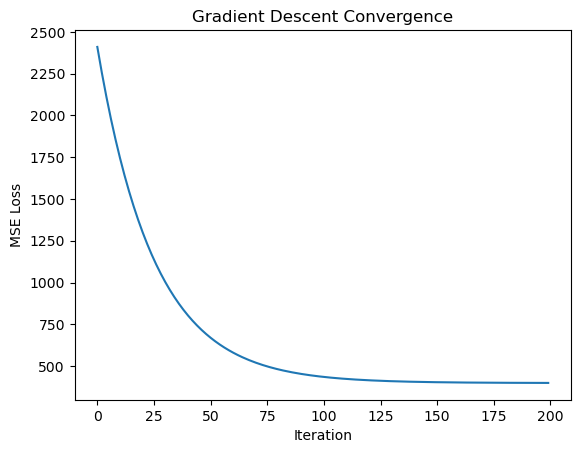

In [3]:
import matplotlib.pyplot as plt 
plt.plot(range(len(lreg.loss_over_time)),
         lreg.loss_over_time)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.show()

We can also check how our Weight (slope) was changing over time

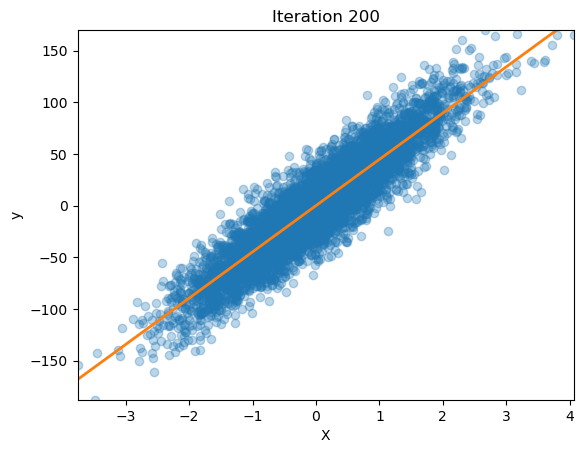

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# prepare data
X = X_train.flatten()
y = y_train
x_vals = np.linspace(X.min(), X.max(), 100)

# set up the figure
fig, ax = plt.subplots()
scat = ax.scatter(X, y, alpha=0.3)
(line,) = ax.plot([], [], lw=2, color='C1')
ax.set_xlim(X.min(), X.max())
ax.set_ylim(y.min(), y.max())
ax.set_xlabel("X"); ax.set_ylabel("y")
ax.set_title("Gradient Descent Fit")

def init():
    line.set_data([], [])
    return (line,)

def update(frame):
    w = float(lreg.w_over_time[frame])
    y_vals = w * x_vals
    line.set_data(x_vals, y_vals)
    ax.set_title(f"Iteration {frame+1}")
    return (line,)

ani = FuncAnimation(
    fig, update, frames=len(lreg.w_over_time),
    init_func=init, blit=True
)

# Save as GIF
writer = PillowWriter(fps=15)
ani.save("gd_fit_evolution.gif", writer=writer)
plt.show(fig)